In [1]:
#imports
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from config import api_key, api_secret, access_token, access_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, parser=tweepy.parsers.JSONParser())

In [2]:
#List of news agencies we will be doing the analysis on
target_users = ('@BBCWorld','@CBSNews','@CNN','@FoxNews','@nytimes')

#create a black list to hold the results
sentiments = []


#iterate through each of the search terms
for target in target_users:
    
    #Create counter
    counter = 1
    tweet_count = 0
    #loop through multiple pages of tweets
    for x in range(8):
        public_tweets = api.user_timeline(target, page = x)
        for tweet in public_tweets:
            #continue looking at tweets only if the tweet count is less than 100
            if tweet_count < 100:
                #only analyze original tweets from the news agencies, not retweets
                if not tweet['retweeted'] and 'RT @' not in tweet['text']:
                    tweet_text = tweet['text']
                        
                    results = analyzer.polarity_scores(tweet_text)
                    compound = results['compound']
                    positive = results['pos']
                    neutral = results['neu']
                    negative = results['neg']
                    tweets_ago = counter
                
                    tweets_ago = tweet['id']-1
                    sentiments.append({"User": target, "compound": compound, "Positive": positive, "Negative": negative, "Neutral": neutral, "Tweets Ago": counter})
                
                    counter += 1
                    tweet_count += 1
                    print(tweet_text)
                    print('---------------------')

Masters 2018: Patrick Reed two ahead at halfway stage https://t.co/uaoUk3l8Dt
---------------------
Molly Ringwald: The Breakfast Club star 'troubled' by hit film https://t.co/7203aQtw3y
---------------------
Viktor Orban: Hungary's nationalist PM eyes third term https://t.co/ovz0AW6yIj
---------------------
Anna Chennault: 'Steel butterfly' who charmed US and China https://t.co/nkUPRi4iwh
---------------------
Week in pictures: 31 March - 6 April 2018 https://t.co/EeMNhTtOxp
---------------------
Bosnia: Cable car in Sarajevo reopens after 26 years https://t.co/1DIOqlscNP
---------------------
Menendez brothers convicted of killing parents reunite in jail https://t.co/THZqwTIN4B
---------------------
Gaza protests: further deaths in renewed border protest https://t.co/wEajQNEp7H
---------------------
Dozens sue Canadian fertility doctor for 'using wrong sperm' https://t.co/fzvcx0Yimp
---------------------
Syria war: Jets strike rebel-held Eastern Ghouta as evacuation stalls https://t.

Catalonia: Ex-police chief Trapero charged with sedition https://t.co/cn9TxGUnQd
---------------------
South Korean university boycotted over 'killer robots' https://t.co/8tDcEUdyh9
---------------------
Turkey university gunman kills four in Eskisehir https://t.co/T2k346TmsE
---------------------
Russian TV airs 'Yulia Skripal phone call' https://t.co/2e5KPwR0kw
---------------------
France military sexism: Minister pledges zero tolerance https://t.co/91KT3vgjr4
---------------------
Dwayne Johnson: The Rock speaks about row with Vin Diesel https://t.co/njtyzYzBsS
---------------------
European tour firm denies Cameroon 'kidnapping' https://t.co/ShXjGZx5Qt
---------------------
Israel Folau: Rugby player criticised for anti-gay post https://t.co/6IpaioyTx2
---------------------
Google should not be in business of war, say employees https://t.co/8V6iO0Cy7f
---------------------
Iranian TV censors Italian football badge https://t.co/gFYodq8bQP
---------------------
Marc Jacobs gets enga

"[Pres. Trump] wants to have a good relationship with Russia, but that's going to depend on some of the actions by… https://t.co/8CYjEXOhoj
---------------------
.@PressSec says Friday is H.R. McMaster's last day at the White House: "The president wishes him well. He will miss… https://t.co/eTiIMDDuZN
---------------------
WATCH LIVE: White House holds the daily press briefing as the U.S. targets Putin's inner circle with new sanctions… https://t.co/cOTdkLIKtJ
---------------------
Facebook announces advertisers running political or issue ads must be verified
https://t.co/pFLdvR3BKn https://t.co/dGz0ak9Ord
---------------------
Russia's communications watchdog says it has asked a court to block access to popular messaging app Telegram… https://t.co/PHewvNwr7j
---------------------
Puerto Rico is running out of time as storm season approaches, FEMA says
https://t.co/b7vUDAw4FA https://t.co/OJynXXcr20
---------------------
Report: Man accused of killing family told professor, "I think I 

Escalating tensions with the United States may put China's trade war arsenal to the test. How much ammo does the co… https://t.co/BFLE6YpAL2
---------------------
Nancy Pelosi, the top House Democrat, calls on EPA Administrator Scott Pruitt to resign https://t.co/MzFySscg8H https://t.co/GVNpV6VDaC
---------------------
The DOJ is allowing all House and Senate intelligence committee members to review the application that it and the F… https://t.co/OI4zTXIYXv
---------------------
DHS pushes back on reaction to reports that it's seeking access to a database of journalists and bloggers, arguing… https://t.co/80aIRGP00j
---------------------
Defense lawyers say that one of the jurors selected this week for Bill Cosby's sexual assault retrial should be rem… https://t.co/7QgQi2v5T3
---------------------
Texas is preparing to deploy National Guard troops and vehicles to the US border with Mexico, the state's top milit… https://t.co/tCslXBBZ5h
---------------------
Virgin Galactic is one step 

Watch the White House press briefing on CNN: https://t.co/UYpqI3w42L https://t.co/lhK9Og6vrv
---------------------
Mexican President to Trump: "Nothing and no one stands above the dignity of Mexico." https://t.co/HzJWTUVTgx https://t.co/fjzW0gYTrx
---------------------
Why Russia keeps laughing at the world | via @CNNopinion https://t.co/zZxtkylnIL https://t.co/EFxw4ODzaw
---------------------
Even at the top, women still face sexism. Just not the kind you'd think. https://t.co/23BTT9OCq1 https://t.co/PzPWrJZCxi
---------------------
People seeking asylum in the United States just arrived on a bus in Puebla, Mexico. @leylasantiago spoke to several… https://t.co/8jzgPpQ7py
---------------------
The mystery of a 4,000-year-old ancient Egyptian mummy's head has finally been solved, after the FBI successfully e… https://t.co/FaCgQvExbi
---------------------
This 17-year-old student got accepted into 19 top universities, including Yale, Stanford, Columbia and the London S… https://t.co/Q3nd

.@kimguilfoyle: “[The press doesn’t] want to give [@POTUS] credit for any of the things that he’s done.” #TheFive https://t.co/SNlSilyRie
---------------------
On "The @dailybriefing," @facebook COO Sheryl Sandberg apologized for the controversial data harvest by Cambridge A… https://t.co/X72eQFGq9V
---------------------
BREAKING: Texas Rep. Blake Farenthold resigns from Congress  https://t.co/K204eDLgG0 https://t.co/lV77D1w1a9
---------------------
Claudia Rosett on new Russian sanctions: "Twenty-seven years ago, the Soviet Union collapsed. These days, Russia is… https://t.co/4q3U9O5p5u
---------------------
#JerseyShoreMTV star Ronnie reveals why he and Sammi 'Sweetheart' broke up https://t.co/L1FzEQObwR
---------------------
Hungary's Viktor Orban, running on anti-mass migration platform, eyes fourth term https://t.co/3faNGqkIBz
---------------------
Mark Penn on @facebook data breach: "I think it's a learning experience for Silicon Valley when the government gets… https://t.co/FEif

The EPA announced on Monday that it would relax Obama-era rules governing auto pollution. The move could lead to a… https://t.co/oqVykUHq6s
---------------------
Dozens of Chinese-made medical products, from defibrillators to dental fillings, could face price increases if the… https://t.co/zPIr0rmA5Z
---------------------
The Kushner family appeared to have struck a deal to buy out its partner in the troubled Fifth Avenue skyscraper at… https://t.co/1KBJFEIHC5
---------------------
Evening Briefing: Here's what you need to know at the end of the day https://t.co/Y0ZkH3LgLs
---------------------
To a whale biologist, the idea of whale species intermingling is mind-bending, but a new study involving genome seq… https://t.co/Hq0P5McdYA
---------------------
In the mood for a great foreign crime show? Here are 11 you can stream tonight. https://t.co/81d0Chmtek
---------------------
President Trump will skip the White House Correspondents' dinner. But he is much more willing to call in to t

Turkish secret agents in 18 countries have seized 80 Turks suspected of having links to a group accused of plotting… https://t.co/teed04ztZb
---------------------
Park Geun-hye, South Korea's impeached and ousted president, was sentenced to 24 years in prison on a variety of cr… https://t.co/YiARBTLnXy
---------------------
Conor McGregor turned himself in to the police in New York City after they said he injured someone by throwing a ha… https://t.co/N6pfX7iaRi
---------------------
After Juli Briskman was photographed extending her middle finger at Trump's motorcade, she lost her job. Now she's… https://t.co/RDcHHrEbP9
---------------------
Treasures taken by British troops 150 years ago could be returned to Ethiopia on a long-term loan from the Victoria… https://t.co/3Oz5KH12YY
---------------------
In this Russian town, people are protesting against a landfill that has become a depot for waste, produced by Moscow https://t.co/u2nt2Qp0Fl
---------------------
How the China-U.S. trad

In [3]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

,Negative,Neutral,Positive,Tweets Ago,User,compound
0,0.000,1.000,0.000,1,@BBCWorld,0.0000
1,0.000,1.000,0.000,2,@BBCWorld,0.0000
2,0.000,1.000,0.000,3,@BBCWorld,0.0000
3,0.000,0.750,0.250,4,@BBCWorld,0.4588
4,0.000,1.000,0.000,5,@BBCWorld,0.0000
5,0.000,1.000,0.000,6,@BBCWorld,0.0000
6,0.328,0.672,0.000,7,@BBCWorld,-0.6597
7,0.358,0.642,0.000,8,@BBCWorld,-0.4404
8,0.256,0.744,0.000,9,@BBCWorld,-0.4767
9,0.375,0.625,0.000,10,@BBCWorld,-0.6597


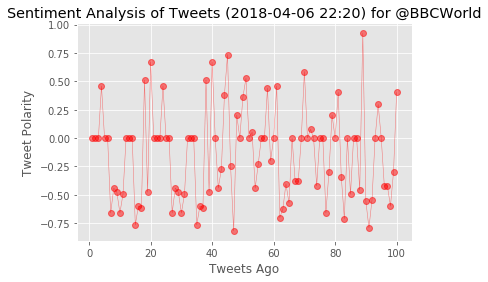

In [4]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@BBCWorld']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@BBCWorld']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'red')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @BBCWorld")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

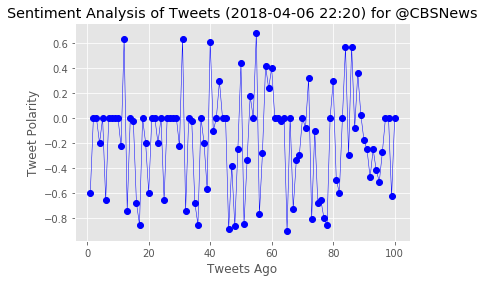

In [5]:
#Analyze @CBSNews
x_vals = sentiments_df[sentiments_df['User'] == '@CBSNews']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@CBSNews']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 1, color = 'blue')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @CBSNews")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

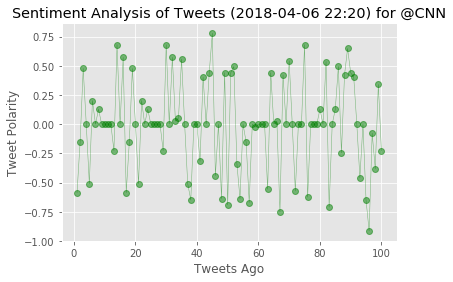

In [6]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@CNN']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@CNN']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'green')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @CNN")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

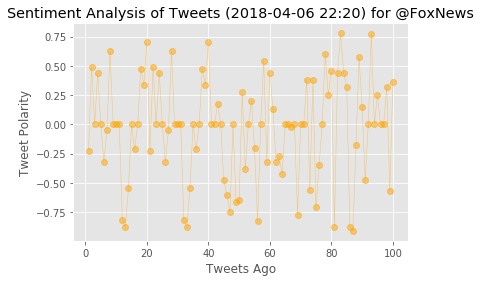

In [7]:
#Analyze BBCWorld
x_vals = sentiments_df[sentiments_df['User'] == '@FoxNews']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@FoxNews']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.5, color = 'orange')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @FoxNews")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

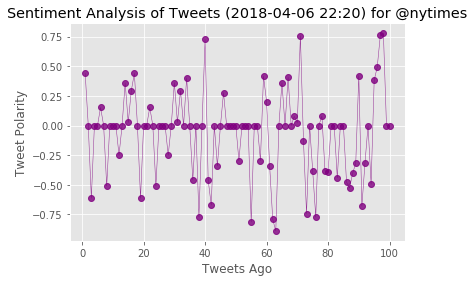

In [8]:
#Analyze NyTimes
x_vals = sentiments_df[sentiments_df['User'] == '@nytimes']['Tweets Ago']
y_vals = sentiments_df[sentiments_df['User'] == '@nytimes']['compound']
plt.plot(x_vals, y_vals, marker = 'o', linewidth=0.5, alpha = 0.8, color = 'purple')

now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for @nytimes")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

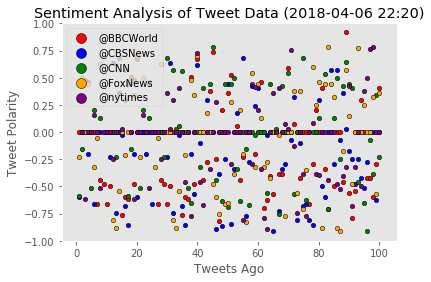

In [9]:
fig, ax = plt.subplots()
groups = sentiments_df.groupby('User')
colors = ['red','blue','green','orange','purple']
for i, (name,group) in enumerate(groups):
    group.plot(kind = 'scatter', x = 'Tweets Ago', y = 'compound', ylim = ((-1,1)), label = name, ax=ax, color = colors[i], edgecolor='black')
lgd = ax.legend(numpoints=1)
ax.set_ylabel('Tweet Polarity')
ax.set_xlabel('Tweets Ago')
ax.set_title(f'Sentiment Analysis of Tweet Data ({now})')
ax.grid()
for handle in lgd.legendHandles:
    handle.set_sizes([100.0])
plt.show()